# 1. Importing Libraries

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# 2. Reading Dataset

In [9]:
# Import Dataset
file_name = "loan_data_set.csv"
df = pd.read_csv(file_name)

# Check if data frame has been created
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(614, 13)

 <span style="color:purple">There are 614 rows (loan applications) and 13 columns (different features or variables) in the loan data set </span>

In [14]:
# Explore the dataset
df.info() # Concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Descriptive statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


---

# 3. Data Exploration

## 3.1 Categorical Variables
 <span style="color:purple"> I will firstly explore the categorical variables - these have discrete values so categories are distinct </span>

### 3.1.1 Loan ID

In [21]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 <span style="color:purple"> There are 614 unique ID's in the dataset </span>

### 3.1.2 Gender

In [22]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

 <span style="color:purple">The dataset seems heavily skewed towards Males. There are 13 missing values</span>

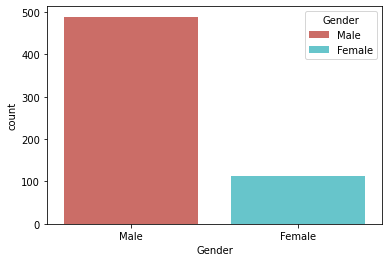

In [32]:
sns.countplot(x='Gender', data=df, palette='hls', hue='Gender')
plt.show()

In [41]:
countMale = len(df[df['Gender'] == 'Male'])
countFemale = len(df[df['Gender'] == 'Female'])
countNull = len(df[df['Gender'].isna()])

print(f'Percentage of Male loan applicants is {countMale/(countMale+countFemale+countNull) * 100:.2f}%')
print(f'Percentage of Female loan applicants is {countFemale/(countMale+countFemale+countNull) * 100:.2f}%')
print(f'Percentage of missing values in Gender column is {countNull/(countMale+countFemale+countNull) * 100:.2f}%')

Percentage of Male loan applicants is 79.64%
Percentage of Female loan applicants is 18.24%
Percentage of missing values in Gender column is 2.12%


 <span style="color:purple">We can confirm from the results above, that the number of Male loan applicants is higher compared to Female applicants. We can also see that roughly 2% of the column contain missing values.</span>

### 3.1.3 Married 

In [39]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

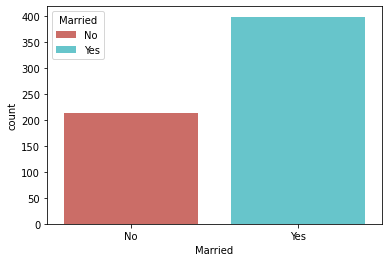

In [40]:
sns.countplot(x='Married', data=df, palette='hls', hue='Married')
plt.show()

In [42]:
countMarried = len(df[df['Married'] == 'Yes'])
countNotMarried = len(df[df['Married'] == 'No'])
countNull = len(df[df['Married'].isna()])

print(f'The percentage of married applicants is {countMarried/(countMarried+countNotMarried+countNull) * 100:.2f}%')
print(f'The percentage of non-married applicants is {countNotMarried/(countMarried+countNotMarried+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Married column in {countNull/(countMarried+countNotMarried+countNull) * 100:.2f}%')

The percentage of married applicants is 64.82%
The percentage of non-married applicants is 34.69%
The percentage of missing values in the Married column in 0.49%


 <span style="color:purple">The number of married applicants is higher compared to applicants that aren't. A small percentage of the column contains missing values.</span>

### 3.1.4 Education

In [43]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

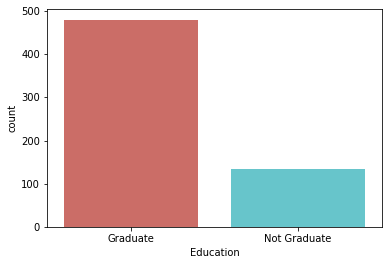

In [46]:
sns.countplot(x='Education', data=df, palette='hls', hue='Education')
plt.show()

In [47]:
countGrad = len(df[df['Education'] == 'Graduate'])
countNotGrad = len(df[df['Education'] == 'Not Graduate'])
countNull = len(df[df['Education'].isna()])

print(f'The percentage of graduates is {countGrad/(countGrad+countNotGrad+countNull) * 100:.2f}%')
print(f'The percentage of non-graduates is {countNotGrad/(countGrad+countNotGrad+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Education column is {countNull/(countGrad+countNotGrad+countNull) * 100:.2f}%')

The percentage of graduates is 78.18%
The percentage of non-graduates is 21.82%
The percentage of missing values in the Education column is 0.00%


 <span style="color:purple">The number of applicants that are graduates is higher than those that are not.</span>

### 3.1.5 Self Employed

In [48]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

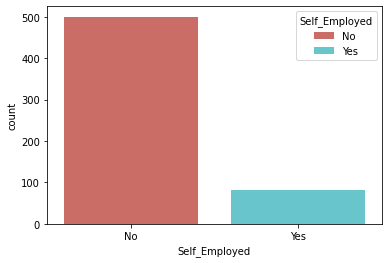

In [50]:
sns.countplot(x='Self_Employed', data=df, palette='hls', hue='Self_Employed')
plt.show()

In [51]:
countSE = len(df[df['Self_Employed'] == 'Yes'])
countNotSE = len(df[df['Self_Employed'] == 'No'])
countNull = len(df[df['Self_Employed'].isna()])

print(f'The percentage of self-employed applicants is {countSE/(countSE+countNotSE+countNull) * 100:.2f}%')
print(f'The percentage of non-self-employed applicants is {countNotSE/(countSE+countNotSE+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Self_Employed column is {countNull/(countSE+countNotSE+countNull) * 100:.2f}%')

The percentage of self-employed applicants is 13.36%
The percentage of non-self-employed applicants is 81.43%
The percentage of missing values in the Self_Employed column is 5.21%
